# 입문자를 위한, 파이썬/R 데이터 분석     

## Today's mission

- 텍스트 데이터 변환
  - PDF 파일 텍스트 읽기
  - PDF 파일 텍스트(.txt) 파일 저장

## 텍스트 데이터 변환
- 예제 PDF 파일 출처: [국토교통부, 제주 제2공항 기본계획(안) 공개, 제주도와 협의 착수](https://www.molit.go.kr/USR/NEWS/m_72/dtl.jsp?lcmspage=1&id=95088010)

### 예제 (1) PDF 파일 텍스트 읽기

In [ ]:
PDF_FILE_PATH = "./data/sample.pdf"

### (1-1) PyMuPDF
[GitHub - PyMuPDF](https://github.com/pymupdf/PyMuPDF)     
[Docs-PyMuPDF](https://pymupdf.readthedocs.io/en/latest/)

In [ ]:
#설치
# !pip install PyMuPDF

In [ ]:
import fitz
path = PDF_FILE_PATH
doc = fitz.open(path)
text = ""
for page in doc:
    sub = page.get_text()
    text += sub
print(text)

### (1-2) PyPDF2
[GitHub - PyPDF2](https://github.com/py-pdf/pypdf)   
[Docs - PyPDF2](https://pypdf2.readthedocs.io/en/3.0.0/)

In [ ]:
#설치
# !pip install PyPDF2

In [ ]:
from PyPDF2 import PdfReader
reader = PdfReader(PDF_FILE_PATH)
pages = reader.pages
text = ""
for page in pages:
    sub = page.extract_text()
    text += sub
print(text)

### (1-4) pdfminer.six
[GitHub-pdfminer.six](https://github.com/pdfminer/pdfminer.six)     
[Docs-pdfminer.six](https://pdfminersix.readthedocs.io/en/latest/)

In [ ]:
#설치
# !pip install pdfminer.six

In [ ]:
from pdfminer.high_level import extract_text
text = extract_text(PDF_FILE_PATH)
print(text)

### (1-5) pdfminer.six
[GitHub-pdfplumber](https://github.com/jsvine/pdfplumber)

In [ ]:
#설치
# !pip install pdfplumber

In [ ]:
import pdfplumber
pdf = pdfplumber.open(PDF_FILE_PATH)
pages = pdf.pages
text = ""
for page in pages:
    sub = page.extract_text()
    text += sub
print(text)

### (1-6) tabula
[GitHub-tabula](https://github.com/chezou/tabula-py)      
[Docs-tabula](https://tabula-py.readthedocs.io/en/latest/?badge=latest)

In [ ]:
#설치
# !pip install tabula-py
#!pip install numpy==1.26.4

In [ ]:
import tabula
dfs = tabula.read_pdf(PDF_FILE_PATH, pages="all", encoding='CP949')
len(dfs)

In [ ]:
dfs[0]

### (1-7) camelot
[Docs-camelot](https://camelot-py.readthedocs.io/en/master/user/advanced.html#visual-debugging)

In [ ]:
# !pip install camelot-py

In [ ]:
# !pip install opencv-python

In [ ]:
# !pip install ghostscript

In [ ]:
# https://ghostscript.com/releases/gsdnld.html
# import ctypes
# from ctypes.util import find_library
# print(find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll"))))

In [1]:
from ctypes.util import find_library
print(find_library("gs"))

/Users/shinminseog/opt/anaconda3/bin/../lib/libgs.dylib


In [2]:
import camelot

In [3]:
tables = camelot.read_pdf('pdf/copy_text.pdf', process_background=True)

In [4]:
tables[0].df

,0,1,2,3,4,5,6,7
0,Sl. \nName of \nName of \nDisease/ Illness \nN...,,,,0\n \n \n19 \n0 \n31/12/13 \n03/01/14 \n11...,,,
1,,Kerala,Kollam,i. Food \nPoisoning,,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,...",
2,,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,,Under \ncontrol,Cases of fever reported from Village Golharw...,
3,,Odisha,Kalahandi,iii. Food \nPoisoning,,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...,
4,,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...,
5,,,Birbhum,v. Food \nPoisoning,,Under \ncontrol,An outbreak of food poisoning reported f...,
6,,,Howrah,vi. Viral \nHepatitis A \n&E,,Under \nsurveillance,Outbreak of \njaundice reported from urban...,
7,,,,,,,,


/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_21143/2994349711.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='joint').show()


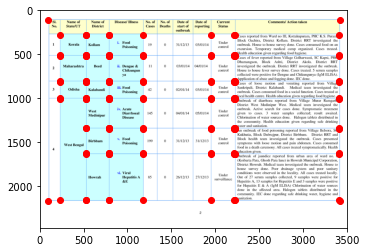

In [5]:
camelot.plot(tables[0], kind='joint').show()

### 예제 (2) PDF 파일 텍스트(.txt) 파일 저장

### (2-1) PDF 그대로 저장

In [ ]:
import fitz
import os
path = PDF_FILE_PATH
doc = fitz.open(path)
text = ""
for page in doc:
    sub = page.get_text()
    text += sub
print(text[:100])

In [ ]:
PDF_FILE_PATH

In [ ]:
def save_pdf_text_as_txt(pdf_path):
    # PDF 파일 열기
    doc = fitz.open(pdf_path)
    # 새로운 파일명 생성
    txt_path = os.path.splitext(pdf_path)[0] + ".txt"

    with open(txt_path, 'w', encoding='utf-8') as file:
        # 각 페이지의 텍스트를 파일에 추가
        for page in doc:
            text = page.get_text()
            file.write(text)

    return txt_path

In [ ]:
PDF_FILE_PATH

In [ ]:
# 함수 호출하여 PDF와 동일한 이름의 텍스트 파일로 저장
save_pdf_text_as_txt(PDF_FILE_PATH)

### (2-2) PDF에 페이지 정보 추가 저장

In [ ]:
import fitz
import os

In [ ]:
def save_pdf_text_with_page_number(pdf_path):
    # PDF 파일 열기
    doc = fitz.open(pdf_path)
    # 새로운 파일명 생성
    txt_path = os.path.splitext(pdf_path)[0] + "_with_page_number.txt"

    with open(txt_path, 'w', encoding='utf-8') as file:
        # 각 페이지의 텍스트와 페이지 번호를 파일에 추가
        for page_num in range(doc.page_count):
            page = doc.load_page(page_num)
            text = page.get_text()
            # 페이지 번호와 함께 텍스트를 파일에 씀
            file.write(text)
            file.write(f"==================== Page {page_num + 1} 페이지 ====================\n\n")
            file.write("\n\n")

    return txt_path

In [ ]:
PDF_FILE_PATH

In [ ]:
# 함수 호출하여 텍스트와 페이지 번호가 추가된 텍스트 파일 생성
save_pdf_text_with_page_number(PDF_FILE_PATH)

- (추가실습) : AG 리더보드 공개-금융, 공공, 의료, 법률, 커머스 한국어 RAG 성능 평가

- [RAG-Evaluation-Dataset-KO](https://huggingface.co/datasets/allganize/RAG-Evaluation-Dataset-KO?ref=blog-ko.allganize.ai)